In [27]:
# !pipreqs ./

# the file generated is empty !
# create a requirements.txt manually

In [28]:
# !conda list -e > requirements.txt
# !pip freeze --local > requirements.txt
# !pip install -r requirements.txt

# Questions


* "Le point d‚Äôentr√©e d‚Äôune API disponible pour le test." ?
code sous forme d'un blackbox
(flask, fast api, etc.)
=> Flask pour ce projet

* html dans le nb ne fonctionne pas (les liens surtout)
* pourquoi certaines eprsonnes sp√©cifient le type de variable de chaque colonne lors de l'import ?
* Pourquoi il est √©galement sp√©cifi√© l'encodage ? Faut il le faire ?
* est ce que je laisse les donn√©es tokenis√©es ?
pour l'instant je donne des tokens √† TfidfVectorizer

monter en comp sur plotly
def de donn√©es non structur√©e (donn√©es type images, textes, audio, etc.)

installer Flask, lire le cours,  
Fichier flask √† part puis on importe le fichier .py

A faire dans le terminal lorsqu'on lance flask il va lancer un serveur web (comme jupyter)

### Objectifs

* Mettre en ≈ìuvre des techniques d‚Äôextraction de features pour des donn√©es non structur√©es
* Repr√©senter graphiquement des donn√©es √† grandes dimensions
* Pr√©traiter des donn√©es non structur√©es pour obtenir un jeu de donn√©es exploitable
* Mettre en ≈ìuvre des techniques de r√©duction de dimension

### Eval
1.
pr√©traitement des donn√©es non structur√©es  
texte nettoy√© avec regex + lib sp√©cialis√©e ex : beautifulsoup  
(traitement html dans des donn√©es)  
    non pertinence de stemming car il est attendu de proposer des mots cl√©s via des topics  
    quels types de mots  
    approche non supervis√© via LDA  
    approche supervis√© en exploitant des tags existants  
    eventuellement en combinant les 2  
    
    analyse critique ex tags existants ne sont pas forc√©ment pertinents
les champs de texte sont nettoy√©s (minuscule etc)  ok
fonction permettant de tokeniser ok
fonction permettant de stemmer
idem lemmatiser

illustration des bonne r√©alisation des √©tapes pr√©c√©dentes

execution de LDA sklearn tps important (regarder cot√© fast LDA)

2.
mise en oeuvre des techniques de r√©duction de donn√©es  
r√©duction de dimention (ex ACP pour donn√©es texte)  
Choix des valeurs de param√®tres est justifi√©

3.
Mettre en oeuvre des techniques de fraction de features  
ex bag of word  
retirer les stopwords  
seuil de fr√©quence de mots  
TDIDF  
vectoris√©

4.
repr√©senter des donn√©es en grande dimention  
au moins un graphique en plus de 2D

expliquer la signification des diff√©rents graph √† un public non expert


In [29]:
%matplotlib inline

# Generic librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

# Text management librairies
from bs4 import BeautifulSoup
import re
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
import contractions


# pd.set_option('display.max_column', 100)

# Activate multi output
InteractiveShell.ast_node_interactivity = "all"

# # For jupyter NB users 
# # set size of window
# display(HTML(data="""
# <style>
#     div#notebook-container    { width: 95%; }
#     div#menubar-container     { width: 65%; }
#     div#maintoolbar-container { width: 99%; }
# </style>
# """))

<img src="14858512893477_so-logo.png" width="600px">    

<h1 style="font-family:verdana;font-size:300%;text-align:left;">Cat√©gorisez automatiquement des questions</h1>

<a id="top"></a>
<h1 style="font-family:verdana;font-size:300%;text-align:left;">Sommaire</h1>

---

* [1. Sujet](#1)
    * [1.1 Contexte](#1.1)
    * [1.2 Extraction SQL](#1.2) 
* [2. Import](#2)
* [3. Cleaning -Exploration](#3)
    * [3.1 Analyse temporelle](#3.1)
    * [3.2 Distributions](#3.2)
    * [3.2 Imputation](#3.3)
* [4. Traitement du texte](#4)
    * [4.1 Text cleaning](#4.1)
    * [4.2 Tokenisation](#4.2)
    * [4.3 Mots les plus fr√©quents](#4.3)
* [5. Feature engeenering](#5)
* [6. Export](#6)


<a id="1"></a>
<h2 style="font-family:verdana;font-size:250%;text-align:left;">1. Sujet</h2>

---

<a id="1.1"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">1.1 Contexte</h3>

Stack Overflow est un site c√©l√®bre de questions-r√©ponses li√©es au d√©veloppement informatique.  
Pour poser une question sur ce site, il faut entrer plusieurs tags de mani√®re √† retrouver facilement la question par la suite.  
Pour les utilisateurs exp√©riment√©s, cela ne pose pas de probl√®me, mais pour les nouveaux utilisateurs, il serait judicieux de sugg√©rer quelques tags relatifs √† la question pos√©e.

Amateur de Stack Overflow, qui vous a souvent sauv√© la mise, vous d√©cidez d'aider la communaut√© en retour.  
Pour cela, vous d√©veloppez un **syst√®me de suggestion de tag** pour le site.  
Celui-ci prendra la forme d‚Äôun algorithme de machine learning qui assigne automatiquement plusieurs tags pertinents √† une question.

<h4 style="font-family:verdana;font-size:125%;text-align:left;">Contraintes</h4>

1. Mettre en ≈ìuvre une approche non supervis√©e.  
2. Utiliser une approche supervis√©e ou non pour extraire des tags √† partir des r√©sultats pr√©c√©dents.  
3. Comparer ses r√©sultats √† une approche purement supervis√©e, apr√®s avoir appliqu√© des m√©thodes d‚Äôextraction de features sp√©cifiques des donn√©es textuelles.  
4. Mettre en place une m√©thode d‚Äô√©valuation propre, avec une s√©paration du jeu de donn√©es pour l‚Äô√©valuation.  
5. Pour suivre les modifications du code final √† d√©ployer, utiliser un logiciel de gestion de versions, par exemple Git.

<a id="1.2"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">1.2 Extraction SQL</h3>

La premi√®re √©tape consiste √† r√©cup√©rer un corpus gr√¢ce √† un outil d‚Äôexport de donn√©es.
Celui ci prend en entr√©e des requ√™tes SQL et fourni des extractions CSV des BDD de StackOverFlow.

Voici la requ√™te utilis√©e pour obtenir la BDD :


>SELECT CreationDate, Score, ViewCount, Body, Title, Tags, AnswerCount, CommentCount, FavoriteCount  
>FROM posts  
>WHERE (Tags IS NOT NULL AND Title IS NOT NULL AND Body IS NOT NULL AND FavoriteCount > 20 AND Score > 100 AND CommentCount > 0)

<a id="2"></a>
<h2 style="font-family:verdana;font-size:250%;text-align:left;">2. Import</h2>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Sommaire</a>

In [55]:
file = "data/QueryResults.csv"
data_raw = pd.read_csv(file, index_col='CreationDate', parse_dates=True)

In [31]:
data_raw.head()
data_raw.shape

Score  ViewCount  \
CreationDate                            
2010-09-27 06:56:36    152      66955   
2008-08-11 08:55:13    147     253229   
2008-08-11 10:27:22    815     576716   
2008-08-11 11:57:17    110     238131   
2008-08-10 18:41:02    539     197771   

                                                                  Body  \
CreationDate                                                             
2010-09-27 06:56:36  <p>I lately had the problem of creating add an...   
2008-08-11 08:55:13  <p>In C, are the shift operators (<code>&lt;&l...   
2008-08-11 10:27:22  <p>Whenever I design a database, I always wond...   
2008-08-11 11:57:17  <p>Is this even a valid question? I have a .NE...   
2008-08-10 18:41:02  <p>What does the expression "Turing Complete" ...   

                                                                 Title  \
CreationDate                                                             
2010-09-27 06:56:36  Good or bad practice for Dialogs in wpf with M...   
2008-08-11 08:55:13  Are the shift operators (<<, >>) arithmetic or...   
2008-08-11 10:27:22     Database, Table and Column Naming Conventions?   
2008-08-11 11:57:17               How do I enable MSDTC on SQL Server?   
2008-08-10 18:41:02                           What is Turing Complete?   

                                                                  Tags  \
CreationDate                                                             
2010-09-27 06:56:36                <c#><.net><wpf><mvvm><modal-dialog>   
2008-08-11 08:55:13           <c><binary><bit-manipulation><bit-shift>   
2008-08-11 10:27:22  <database><database-design><language-agnostic>...   
2008-08-11 11:57:17                                <sql-server><msdtc>   
2008-08-10 18:41:02         <theory><turing-machines><turing-complete>   

                     AnswerCount  CommentCount  FavoriteCount  
CreationDate                                                   
2010-09-27 06:56:36            3            12            115  
2008-08-11 08:55:13           11             1             60  
2008-08-11 10:27:22           23             4            359  
2008-08-11 11:57:17            6             1             30  
2008-08-10 18:41:02           15             1            178

(28077, 8)

Le nombre d'individus semble suffisant pour pouvoir envisager une mod√©lisation du probl√®me gr√¢ce au machine learning.

<a id="3"></a>
<h2 style="font-family:verdana;font-size:250%;text-align:left;">3. Cleaning - Exploration</h2>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Sommaire</a>

Explorons maintenant nos donn√©es.

In [121]:
data = data_raw.copy()

In [33]:
data.describe(include='all')

Score     ViewCount  \
count   28077.000000  2.807700e+04   
unique           NaN           NaN   
top              NaN           NaN   
freq             NaN           NaN   
mean      313.890409  2.900351e+05   
std       495.539472  3.780768e+05   
min       101.000000  2.723000e+03   
25%       135.000000  9.836000e+04   
50%       188.000000  1.824240e+05   
75%       313.000000  3.381630e+05   
max     25462.000000  9.478619e+06   

                                                     Body  \
count                                               28077   
unique                                              28077   
top     <p>I have a <code>contacts</code> table which ...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                    Title   Tags  \
count                                               28077  28077   
unique                                              28077  21511   
top     How to open a new tab in GNOME Terminal from c...  <git>   
freq                                                    1    271   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

         AnswerCount  CommentCount  FavoriteCount  
count   28077.000000  28077.000000   28077.000000  
unique           NaN           NaN            NaN  
top              NaN           NaN            NaN  
freq             NaN           NaN            NaN  
mean       12.744595      3.862913     100.568009  
std        10.265817      3.664729     191.941342  
min         0.000000      1.000000      21.000000  
25%         6.000000      1.000000      36.000000  
50%        10.000000      3.000000      56.000000  
75%        16.000000      5.000000     100.000000  
max       320.000000     61.000000   11331.000000

Features :
* Score - Vote des utilisateurs
* ViewCount - nombre de vues
* Body - corps du post
* Title - Titre
* Tags - Tags assign√©s par StackOverFlow
* AnswerCount - Nombre de r√©ponses
* CommentCount - Nombre de commentaires
* FavoriteCount - Nombre de fois mis en favoris

Constats :
* Les messages et les titres sont uniques
* Ce n'est pas le cas des Tag

<a id="3.1"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">3.1 Analyse temporelle</h3>

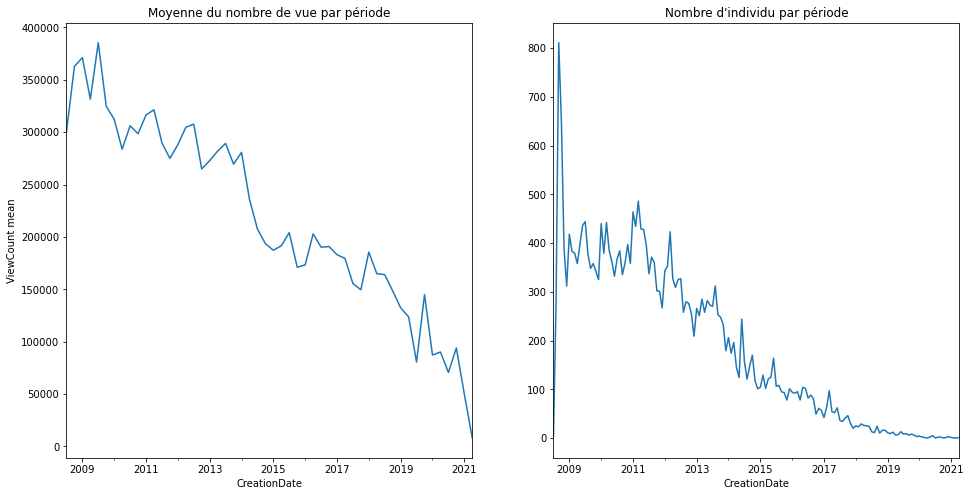

In [34]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
data['ViewCount'].resample('3M').mean().plot()
plt.ylabel('ViewCount mean')
plt.title('Moyenne du nombre de vue par p√©riode')

plt.subplot(122)
data['Score'].resample('M').count().plot()
plt.title("Nombre d'individu par p√©riode")

plt.show();

On constate que les posts les plus anciens on en moyenne plus de vue que les r√©cents.
De plus le nombre d'individu par p√©riode remplissant les conditions de notre requ√™te SQL est √©galement en diminution.

Cela peut s'expliquer par :
- Le temps que le post a √©t√© en ligne.
- La diminution du nombre de probl√®me n'ayant pas √©t√© trait√© au cours du temps.

<a id="3.2"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">3.2 Distributions</h3>

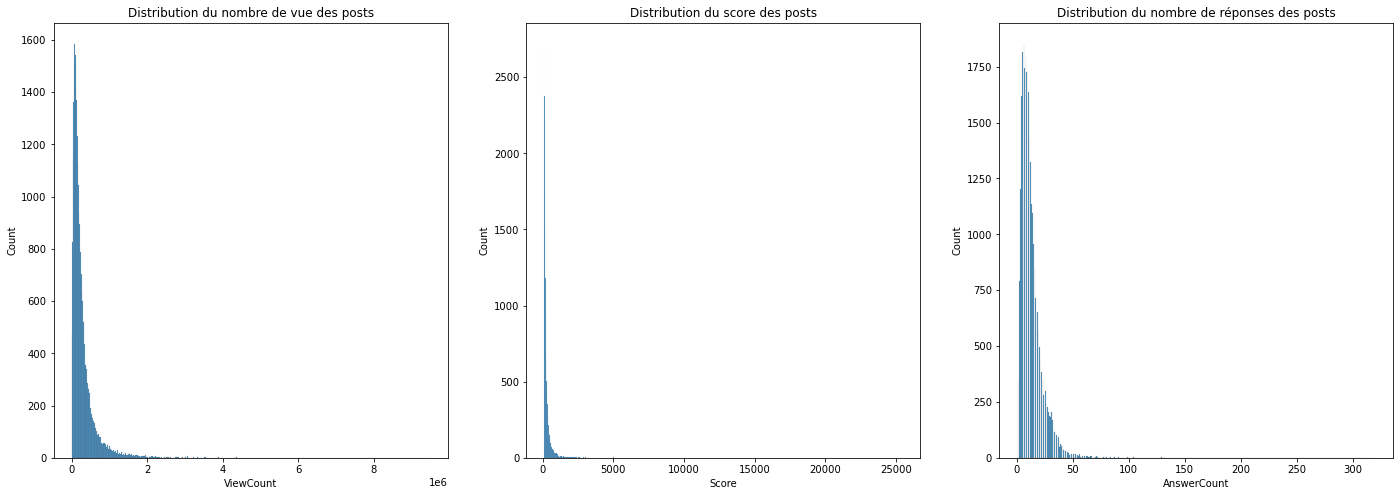

In [35]:
plt.figure(figsize=(24, 8))

plt.subplot(131)
sns.histplot(data['ViewCount'])
plt.title('Distribution du nombre de vue des posts')

plt.subplot(132)
sns.histplot(data['Score'])
plt.title('Distribution du score des posts')

plt.subplot(133)
sns.histplot(data['AnswerCount'])
plt.title('Distribution du nombre de r√©ponses des posts')

plt.show();

Ces distributions sont tr√®s √©tal√©es sur la droite, tentons de visualiser la distribution de leur logarithme.

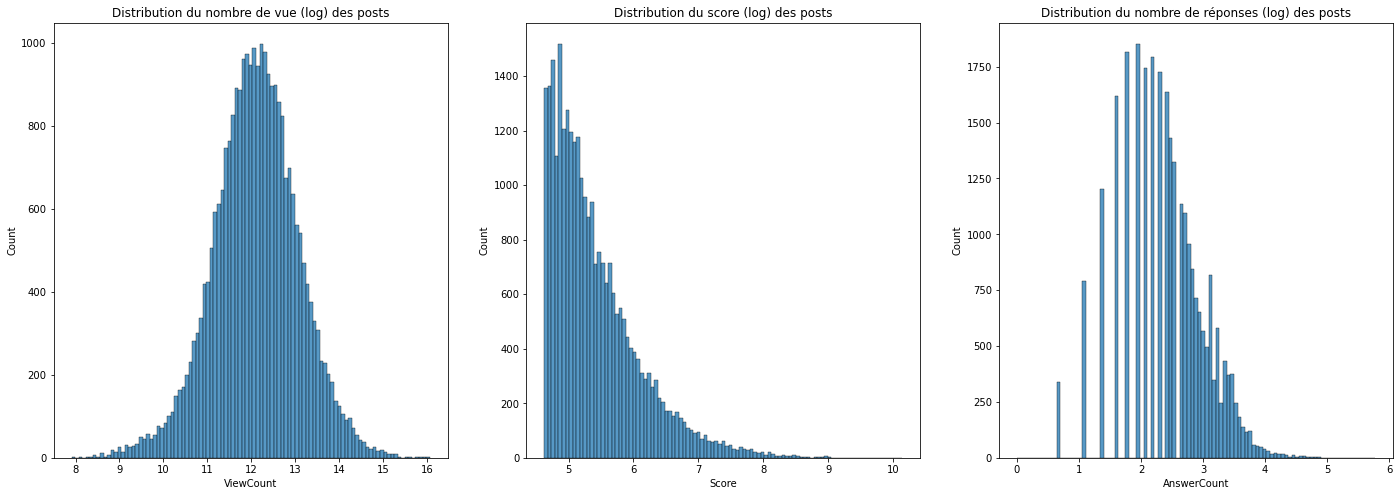

In [36]:
plt.figure(figsize=(24, 8))

plt.subplot(131)
sns.histplot(np.log1p(data['ViewCount']))
plt.title('Distribution du nombre de vue (log) des posts')

plt.subplot(132)
sns.histplot(np.log1p(data['Score']))
plt.title('Distribution du score (log) des posts')

plt.subplot(133)
sns.histplot(np.log1p(data['AnswerCount']))
plt.title('Distribution du nombre de r√©ponses (log) des posts')

plt.show();

Les distribution des log de ViewCount et AnswerCount semble √™tre normales.  
Dans un exercice o√π les outliers perturbent notre mod√®le nous aurions pu les √©liminer apr√®s avoir effectu√© une transformation log.

<a id="3.3"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">3.3 Imputation</h3>

In [37]:
(data.isna().sum()/data.shape[0]).sort_values()

Score            0.0
ViewCount        0.0
Body             0.0
Title            0.0
Tags             0.0
AnswerCount      0.0
CommentCount     0.0
FavoriteCount    0.0
dtype: float64

Nous constatons que le dataset est totalement renseign√©.  
Il n'y a donc aps de n√©cessit√© d'imputer nos donn√©es.

<a id="4"></a>
<h2 style="font-family:verdana;font-size:250%;text-align:left;">4. Traitement du texte</h2>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Sommaire</a>

Nous allons maintenant traiter les donn√©es textuelles.
Notre but est d'optenir des mots s√©par√©s dans une liste.

<a id="4.1"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">4.1 Text cleaning</h3>

Plusieurs √©tapes seront n√©cessaires, voici les premi√®res :
1. Traitement du code html
1. Etendre les contractions
1. Traitement des caract√®res nuisibles (ex: /n)
1. Mettre en minuscules

Options : 
* autocorrect
* Expand contractions par dictionnaire
* Enlever ce qui est entre les balises code




In [122]:
col_txt = ['Body', 'Title']

col_w = pd.options.display.max_colwidth
pd.options.display.max_colwidth = 500 # Print more data to tokenize
data.head(2)

pd.options.display.max_colwidth = col_w

Score  ViewCount  \
CreationDate                            
2010-09-27 06:56:36    152      66955   
2008-08-11 08:55:13    147     253229   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Body  \
CreationDate                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
2010-09-27 06:56:36  <p>I lately had the problem of creating add and edit dialogs for my wpf app.</p>\n\n<p>All I want to do in my code was something like this. (I mostly use viewmodel first approach with mvvm)</p>\n\n<p>ViewModel which calls a dialog window:</p>\n\n<pre><code>var result = this.uiDialogService.ShowDialog("Dialogwindow Title", dialogwindowVM);\n// Do anything with the dialog result\n</code></pre>\n\n<p>How does it work?</p>\n\n<p>First, I created a dialog service:</p>\n\n<pre><code>public interfa...   
2008-08-11 08:55:13                                                                                                                                                                                                                                                                                                                                                                                                         <p>In C, are the shift operators (<code>&lt;&lt;</code>, <code>&gt;&gt;</code>) arithmetic or logical?</p>\n   

                                                                            Title  \
CreationDate                                                                        
2010-09-27 06:56:36            Good or bad practice for Dialogs in wpf with MVVM?   
2008-08-11 08:55:13  Are the shift operators (<<, >>) arithmetic or logical in C?   

                                                         Tags  AnswerCount  \
CreationDate                                                                 
2010-09-27 06:56:36       <c#><.net><wpf><mvvm><modal-dialog>            3   
2008-08-11 08:55:13  <c><binary><bit-manipulation><bit-shift>           11   

                     CommentCount  FavoriteCount  
CreationDate                                      
2010-09-27 06:56:36            12            115  
2008-08-11 08:55:13             1             60


Nous allons utiliser une librairie sp√©cialis√©e pour extraire le texte de ces donn√©es : 

In [123]:
def cleaner(text):
    """ Tokenizer. Remove Html tags, extra spaces, ; put in lowercase"""

    text = BeautifulSoup(text, 'html.parser')
    text = text.get_text(strip=True)
    text = contractions.fix(text) # remove contractions 's => is...
    text = re.sub(r"\n", " ", text) # match all literal Line Feed (New line) pattern then replace them by a single whitespace
    text = re.sub(r'\s+', ' ', text) # match all one or more whitespace then replace them by a single whitespace
    text = text.lower()

    return text

In [124]:
# data['Body'][0]

for col in col_txt:
    data[col] = data[col].apply(lambda x: cleaner(x))

<a id="4.2"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">4.2 Tokenization</h3>

Notre texte est maintenant nettoy√©.  
La prochaine √©tape consiste √† le tokeniser.

Pour cela nous utilisesont une expression r√©guli√®re en prenant soint de garder la lettre c seule pour la language de programmation.
Nous tokeniserons aussi les tags propos√©s par Stackoverflow.

In [115]:
# only 2 caract. min words except for c for the langage
tokenizer_txt = nltk.RegexpTokenizer(r'[a-zA-Z]{2,}|c') 

# Take everything between the <>
tokenizer_tags = nltk.RegexpTokenizer(r'(?<=\<).+?(?=\>)')

In [78]:
data_raw.Body[2100]

'<p>I have a  server side function that requires login. If the user is logged in the function will return 1 on success. If not, the function will return the login-page.</p>\n\n<p>I want to call the function using Ajax and jQuery. What I do is submit the request with an ordinary link, with a click-function applied on it. If the user is not logged in or the function fails, I want the Ajax-call to return true, so that the href triggers. </p>\n\n<p>However, when I use the following code, the function exits before the Ajax call is done.</p>\n\n<p>How can I redirect the user gracefully to the loginpage?</p>\n\n<pre><code>$(".my_link").click(\n    function(){\n    $.ajax({\n        url: $(this).attr(\'href\'),\n        type: \'GET\',\n        cache: false,\n        timeout: 30000,\n        error: function(){\n            return true;\n        },\n        success: function(msg){ \n            if (parseFloat(msg)){\n                return false;\n            } else {\n                return tru

In [125]:
col_tok = [(e + '_tok') for e in col_txt]

In [126]:
for coltok, coltxt in zip(col_tok, col_txt):
    data[coltok] = data[coltxt].apply(lambda x: tokenizer_txt.tokenize(x))

data['Tags_tok'] = data['Tags'].apply(lambda x: tokenizer_tags.tokenize(x))

In [118]:
data.head()

Score  ViewCount  \
CreationDate                            
2010-09-27 06:56:36    152      66955   
2008-08-11 08:55:13    147     253229   
2008-08-11 10:27:22    815     576716   
2008-08-11 11:57:17    110     238131   
2008-08-10 18:41:02    539     197771   

                                                                  Body  \
CreationDate                                                             
2010-09-27 06:56:36  i lately had the problem of creating add and e...   
2008-08-11 08:55:13  in c, are the shift operators (<<,>>) arithmet...   
2008-08-11 10:27:22  whenever i design a database, i always wonder ...   
2008-08-11 11:57:17  is this even a valid question? i have a .net w...   
2008-08-10 18:41:02  what does the expression "turing complete" mea...   

                                                                 Title  \
CreationDate                                                             
2010-09-27 06:56:36  good or bad practice for dialogs in wpf with m...   
2008-08-11 08:55:13  are the shift operators (<<, >>) arithmetic or...   
2008-08-11 10:27:22     database, table and column naming conventions?   
2008-08-11 11:57:17               how do i enable msdtc on sql server?   
2008-08-10 18:41:02                           what is turing complete?   

                                                                  Tags  \
CreationDate                                                             
2010-09-27 06:56:36                <c#><.net><wpf><mvvm><modal-dialog>   
2008-08-11 08:55:13           <c><binary><bit-manipulation><bit-shift>   
2008-08-11 10:27:22  <database><database-design><language-agnostic>...   
2008-08-11 11:57:17                                <sql-server><msdtc>   
2008-08-10 18:41:02         <theory><turing-machines><turing-complete>   

                     AnswerCount  CommentCount  FavoriteCount  \
CreationDate                                                    
2010-09-27 06:56:36            3            12            115   
2008-08-11 08:55:13           11             1             60   
2008-08-11 10:27:22           23             4            359   
2008-08-11 11:57:17            6             1             30   
2008-08-10 18:41:02           15             1            178   

                                                              Body_tok  \
CreationDate                                                             
2010-09-27 06:56:36  [lately, had, the, problem, of, creating, add,...   
2008-08-11 08:55:13  [in, c, are, the, shift, operators, arithmetic...   
2008-08-11 10:27:22  [whenever, design, database, always, wonder, i...   
2008-08-11 11:57:17  [is, this, even, valid, question, have, net, w...   
2008-08-10 18:41:02  [what, does, the, expression, turing, complete...   

                                                             Title_tok  \
CreationDate                                                             
2010-09-27 06:56:36  [good, or, bad, practice, for, dialogs, in, wp...   
2008-08-11 08:55:13  [are, the, shift, operators, arithmetic, or, l...   
2008-08-11 10:27:22  [database, table, and, column, naming, convent...   
2008-08-11 11:57:17          [how, do, enable, msdtc, on, sql, server]   
2008-08-10 18:41:02                       [what, is, turing, complete]   

                                                              Tags_tok  
CreationDate                                                            
2010-09-27 06:56:36                [c#, .net, wpf, mvvm, modal-dialog]  
2008-08-11 08:55:13           [c, binary, bit-manipulation, bit-shift]  
2008-08-11 10:27:22  [database, database-design, language-agnostic,...  
2008-08-11 11:57:17                                [sql-server, msdtc]  
2008-08-10 18:41:02         [theory, turing-machines, turing-complete]

<a id="4.3"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">4.3 Mots les plus fr√©quents</h3>

Nous allons maintenant enlever les mots les plus fr√©quents.  
En effets ceux ci n'apportent pas d'information n√©cessaires pour notre mod√®le et le perturbe.

Nous allons utiliser une liste standard fournie par nltk.

Options :
* Ajouter les mots les plus fr√©quents de notre corpus √† cette liste
* Enlever les adjectifs (gr√¢ce aux tag nltk)

In [119]:
def remove_stopwords(list_of_words):
    """remove common words in english by using nltk.corpus's list"""
    list_of_words = [w for w in list_of_words if not w in sw]
    
    return list_of_words

sw = stopwords.words("english")

In [127]:
for col in col_tok:
    data[col] = data[col].apply(lambda x: remove_stopwords(x))

<a id="4.4"></a>
<h3 style="font-family:verdana;font-size:200%;text-align:left;">4.4 Stemming / Lemmatization</h3>

Le processus de ¬´ lemmatisation ¬ª consiste √† repr√©senter les mots (ou ¬´ lemmes ¬ª üòâ) sous leur forme canonique. Par exemple pour un verbe, ce sera son infinitif. Pour un nom, son masculin singulier. L'id√©e √©tant encore une fois de ne conserver que le sens des mots utilis√©s dans le corpus.

racinisation(ou stemming en anglais). Cela consiste √† ne conserver que la racine des mots √©tudi√©s. L'id√©e √©tant de supprimer les suffixes, pr√©fixes et autres des mots afin de ne conserver que leur origine. C'est un proc√©d√© plus simple que la lemmatisation et plus rapide √† effectuer puisqu'on tronque les mots essentiellement contrairement √† la lemmatisation qui n√©cessite d'utiliser un dictionnaire.

<a id="4.4.1"></a>
<h4 style="font-family:verdana;font-size:150%;text-align:left;">4.4.1 Stemming</h3>

In [129]:
stemmer = nltk.PorterStemmer()

def stem_text(list_of_words):
    """Stem the text"""
    list_of_words = [stemmer.stem(w) for w in list_of_words] # Stem each words
    return list_of_words

In [131]:
# Example
data.Body_tok[1]
stem_text(data.Body_tok[1])

['c', 'shift', 'operators', 'arithmetic', 'logical']

['c', 'shift', 'oper', 'arithmet', 'logic']

<a id="4.4.2"></a>
<h4 style="font-family:verdana;font-size:150%;text-align:left;">4.4.2 Lemmatization</h3>

Lemmatize using WordNet‚Äôs built-in morphy function. Returns the input word unchanged if it cannot be found in WordNet.

In [105]:
lemmatizer = nltk.WordNetLemmatizer()

def lem_text(list_of_words):
    """Lemmatization of the text"""
    list_of_words = [lemmatizer.lemmatize(w) for w in list_of_words] # Lemmatize each words
    return list_of_words

In [132]:
# sample
data.Body_tok[1]
lem_text(data.Body_tok[1])

['c', 'shift', 'operators', 'arithmetic', 'logical']

['c', 'shift', 'operator', 'arithmetic', 'logical']

In [133]:
for col in col_tok:
    data[col] = data[col].apply(lambda x: lem_text(x))

<a id="5"></a>
<h2 style="font-family:verdana;font-size:250%;text-align:left;">5. Feature engineering</h2>

Nous allons maintenant rajouter une feture qui est simplement la concat√©nation du body et du title de chaque question.wy

In [134]:
data['Text_tok'] = data['Title_tok'] + data['Body_tok'] # adding lists
data['Text'] = data['Title'] + ' ' + data['Body'] # adding text with a space

In [135]:
data['Text'][1]

'are the shift operators (<<, >>) arithmetic or logical in c? in c, are the shift operators (<<,>>) arithmetic or logical?'

<a id="6"></a>
<h2 style="font-family:verdana;font-size:250%;text-align:left;">6. Export</h2>

In [136]:
data.to_csv("data\data_clean.csv")